In [1]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'speech-multilingual-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4745215%2F8047181%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240406%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240406T172237Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd5c06f4392c28f662de0938f9693cab5e8b76a891081bdce2b27cf611253db55d8dda8eaf4f62b0ddb76bbd7b01c982b2c93dba6fb9e6d6c6dcabba95c2e522d2541de4ff6f5419c56b89ac85cf8868fc2c1e5b22e5f9f483bae0c9f4c9dcc2e7b245d9008fe25234acd9e2ab56a8671976bbaae07aa65ef98e6b503fdfc0979c65b7d21ee8a16bbe30d219a9552f023bfdec54ed467cf19a208ee48bb5d2b7d46832593b376106235b47742cb0ecbdb6c973c8d8687e683a566e054f5f13ee79b08a2c906e6688861e223f8c92468d0046d05f4b952a32e78f1062f4e9c6c3ec1a1aa5528ea1b11b29a030944a1ba50ca1c30a2100156aead7af966c9117324'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


In [2]:
# pip install librosa

In [3]:
# pip install spafe

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
from tqdm import tqdm

In [5]:
from sklearn.model_selection import train_test_split  ,GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = {
    'file':[],
    'y':[],
    'sr':[],
    'class':[],
}
files = sorted(os.listdir('./Speech Recordings/'))
for file in tqdm(files):
    class_name = file.split('.')[0].split('_')[0]
    # print(class_name,file)
    y, sr  = librosa.load('./Speech Recordings/' + file)
    df['file'].append(file)
    df['y'].append(y)
    df['sr'].append(sr)
    df['class'].append(class_name)
    # break
df = pd.DataFrame(df)

100%|██████████| 90/90 [00:08<00:00, 10.52it/s]


In [8]:
df.head()

,file,y,sr,class
0,Aayushi_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi
1,Aayushi_E_10.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi
2,Aayushi_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi
3,Aayushi_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi
4,Aayushi_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi


In [9]:
df['targets'] = LabelEncoder().fit_transform(df['class'])

In [10]:
df

,file,y,sr,class,targets
0,Aayushi_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
1,Aayushi_E_10.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
2,Aayushi_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
3,Aayushi_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
4,Aayushi_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
...,...,...,...,...,...
85,Yashmitha_E_5.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Yashmitha,8
86,Yashmitha_E_6.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Yashmitha,8
87,Yashmitha_E_7.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Yashmitha,8
88,Yashmitha_E_8.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Yashmitha,8


In [11]:
df['class'].unique()

array(['Aayushi', 'Aditi', 'Arnav', 'Datta', 'Jyothi', 'Kushal', 'Mohit',
       'Nachiketa', 'Yashmitha'], dtype=object)

In [12]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

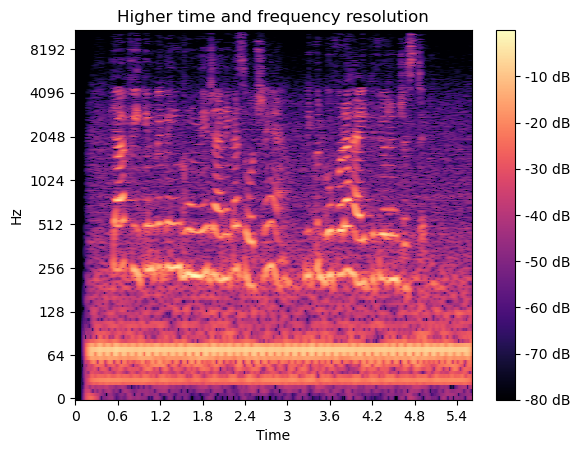

In [13]:
fig, ax = plt.subplots()
D_highres = librosa.stft(y, hop_length=256, n_fft=4096)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)
ax.set(title='Higher time and frequency resolution')
fig.colorbar(img, ax=ax, format="%+2.f dB")

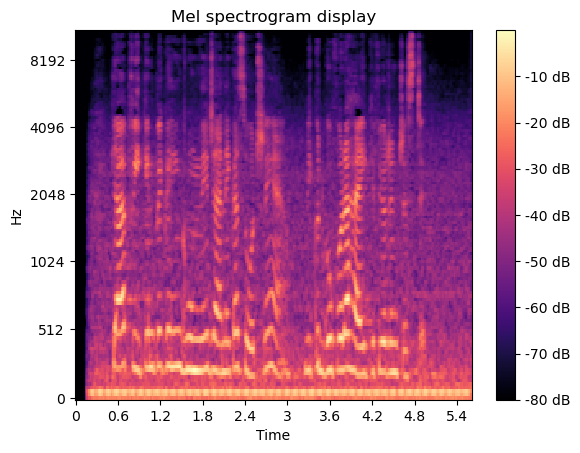

In [14]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

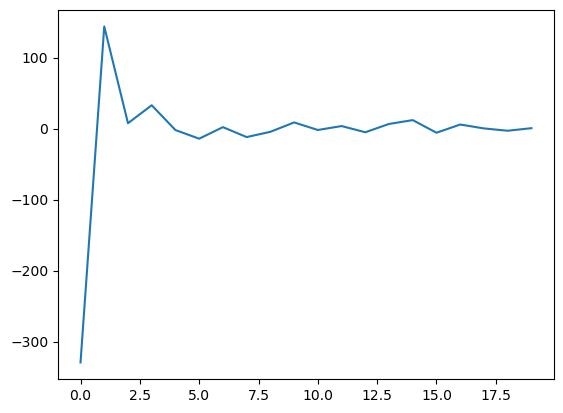

In [15]:
plt.plot([np.mean(feature) for feature in librosa.feature.mfcc(y=df['y'][0])])

In [16]:
def train_model(df,n_mfcc = 40,n_fft = 2048):

    X = []
    max_length = 0
    for sig, fs in df[['y','sr']].values:
        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft)
        mfccs_scaled = np.mean(mfccs.T,axis=0)
        # print(mfccs_scaled.shape)
        X.append(mfccs_scaled)
    # return 


    X_train, X_test, y_train, y_test = train_test_split(X,df.targets.values,random_state=5,shuffle=True,test_size=0.3,stratify=df.targets.values)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("Number of Features: ",n_mfcc)
    print("Number of FFT samples: ",n_fft)

    print(f"train size: {len(X_train)}, test size: {len(X_test)}")

    clf_params =  {
                    'C':(0.2,0.8,2,4,30),
                    'kernel':('linear','rbf','poly','sigmoid'),
                    'decision_function_shape' : ['ovo', 'ovr'],
                    'degree':np.arange(3,5,1)
                    }

    model = SVC(probability=True)

    grid = GridSearchCV(model,clf_params,scoring='f1_macro',cv=4,n_jobs=-1)


    print("Using Model : ",model.__class__.__name__)



    grid.fit(X_train,y_train)
    y_pred = grid.predict(X_test)
    pred_prob = grid.predict_proba(X_test)
    print(pred_prob.shape)


    print("Best Parameters: ",grid.best_params_)


    matrix = confusion_matrix(y_test, y_pred)
    print('Class wise Accuracy Score : ', matrix.diagonal()/matrix.sum(axis=1))
    print('Class wise roc_auc score: ',roc_auc_score(y_test,pred_prob,multi_class='ovr',average=None))

    print("Classification Report: \n\n")
    print(classification_report(y_test,y_pred,target_names=df['class'].unique()))


    fpr = {}
    tpr = {}
    thresh ={}
    n_class = df.targets.nunique()

    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
        plt.plot(fpr[i], tpr[i], label = f'{i} vs rest',color = np.random.choice(['r','g','b','y','c','m','k']))
    plt.legend()
    plt.title("AUC-ROC Curve")
    plt.show()
    return grid

In [17]:
# gd = train_model(df,n_mfcc = 50,n_fft = 512)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.feature_selection import (RFE, SelectKBest,
                                       SelectPercentile,RFECV)
import sklearn

def Classification(X_train, X_test, y_train, y_test,data,name:str,Gridsearch = False,nsplits=10):
    try:
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()
    except:
        pass

    classifiers = [
    KNeighborsClassifier(),
    LogisticRegression()
    ]
    if Gridsearch ==True:
        clf_parameters = [
            {
                "clf__n_neighbors": np.arange(2,25 ,1),
                "clf__metric": ["minkowski","cityblock","cosine","euclidean","l1","l2","manhattan","nan_euclidean",],
                "clf__weights": ["uniform", "distance"],
                "clf__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
         },
        {
                "clf__C": np.logspace(-2, -1.5, 30),
                "clf__penalty": ["l1", "l2", "elasticnet", "none"],
                "clf__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        }
         ]
    else:
        clf_parameters = [{},{}]
    data[name] = {'Model':[],'Accuracy' :[],'f1_micro' :[],'f1_macro' :[]}
    dataint = {'Model':[],'Accuracy' :[],'f1_micro' :[],'f1_macro' :[]}

    i=1
    for classifier,clf_params in zip(classifiers,clf_parameters):
        pipe = Pipeline(steps=[('clf', classifier)])
        grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=nsplits,n_jobs=-1)
        try:
            grid.fit(X_train, y_train)
            pred = grid.predict(X_test)
            print("_"*32)
            print(f'{i}.',classifier)
            print("_"*32)
            print(grid.best_params_)
            print(classification_report(y_test, pred))
            i+=1
            i1 = classifier.__class__.__name__
            i2 = sklearn.metrics.accuracy_score(y_test,pred)
            i3 = sklearn.metrics.f1_score(y_test,pred,average='micro')
            i4 = sklearn.metrics.f1_score(y_test,pred,average='macro')
            dataint['Model'].append(i1)
            dataint['Accuracy'].append(i2)
            dataint['f1_micro'].append(i3)
            dataint['f1_macro'].append(i4)
            print("-"*80)
            print("-"*80)

        except Exception as e: print(e)
    classifiers = [
        DecisionTreeClassifier(),
        SVC(),
        NuSVC(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        SGDClassifier()
        ]
    base_estimators = classifiers
    if Gridsearch==True:
        clf_parameters = [
                          {
                'clf__criterion' : ["gini", "entropy"],
            'clf__max_features':['sqrt', 'log2',None],
        #             'max_depth':np.linspace(140,190,10),
                    'clf__ccp_alpha':np.logspace(-3,-2,20),#np.logspace(-2.32,-2.3,20),
            "clf__max_leaf_nodes" : [None]+np.arange(30,40,5).tolist(),

            "clf__splitter" : ["best", "random"],
            "clf__min_samples_split":np.arange(2,50,10)
        },


            {
                    'clf__C':(0.8,2,30),
                    'clf__kernel':('linear','rbf','poly','sigmoid'),
                    'clf__decision_function_shape' : ['ovo', 'ovr'],
                    'clf__degree':np.arange(3,5,1)
                    },
            {
                'clf__nu': np.logspace(-1.15,-1.23,5),#np.logspace(-2,-1,30)
             'clf__kernel' : ['linear', 'poly', 'rbf', 'sigmoid' ]   ,
                'clf__gamma' : ['scale', 'auto'],
                'clf__degree':np.arange(3,5,1),
                'clf__decision_function_shape' : ['ovo', 'ovr'],
            },
            {
                 'clf__n_estimators': [150,200,250],
            'clf__max_features': ['sqrt', 'log2',None],
            'clf__max_depth' : [None],#np.arange(4,15,2).tolist(),
            'clf__criterion' :['gini', 'entropy']   ,
                'clf__bootstrap' :[True],
        #         'clf__ccp_alpha':np.logspace(-2,1,10)
            },
            {
                'clf__estimator':[RandomForestClassifier(),DecisionTreeClassifier(criterion='entropy'),SVC(),LogisticRegression(**{'C': 0.017433288221999882, 'penalty': 'l2', 'solver': 'newton-cg'})],
                'clf__algorithm' : ['SAMME', 'SAMME.R'],
                'clf__n_estimators': [50,100]
            },
            {
              'clf__loss' :['log_loss', 'exponential'],
                'clf__criterion' : ['friedman_mse', 'squared_error'],
                'clf__max_features' : [ 'sqrt', 'log2'],
                'clf__learning_rate': np.logspace(-1,1,5),
                'clf__n_estimators':np.arange(100,1000,200)

            },
            {
                'clf__loss' :['hinge', 'log_loss', 'modified_huber','squared_hinge', 'perceptron'],
                'clf__penalty' : ['l2', 'l1', 'elasticnet'],
                'clf__alpha' : np.logspace(-4,-2,30),
                'clf__learning_rate' :[ 'constant','optimal','invscaling','adaptive'],
            }
            ]
    else:
        clf_parameters = [{}]*len(classifiers)
    for classifier,clf_params in zip(classifiers,clf_parameters):
        pipe = Pipeline(steps=[('standardscaler', StandardScaler()),('clf', classifier)])
        grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=nsplits,n_jobs=-1)
        try:
            grid.fit(X_train, y_train)
            pred = grid.predict(X_test)
            print("_"*32)
            print(f'{i}.',classifier)
            print("_"*32)
            print(grid.best_params_)
            print(classification_report(y_test, pred))
            i=i+1
            i1 = classifier.__class__.__name__
            i2 = sklearn.metrics.accuracy_score(y_test,pred)
            i3 = sklearn.metrics.f1_score(y_test,pred,average='micro')
            i4 = sklearn.metrics.f1_score(y_test,pred,average='macro')
            dataint['Model'].append(i1)
            dataint['Accuracy'].append(i2)
            dataint['f1_micro'].append(i3)
            dataint['f1_macro'].append(i4)
            print("-"*80)
            print("-"*80)

        except Exception as e: print(e)


    classifiers = [
    GaussianNB(),
    MultinomialNB()
    ]
    if Gridsearch==True:
        clf_parameters = [
            {
            'clf__var_smoothing':np.logspace(-20,-10,10)
            },
            {
                'clf__alpha':[0] + np.logspace(-2,5,5).tolist(),
                'clf__fit_prior':[True,False]
            }
             ]
    else:
        clf_parameters = [{}]*len(classifiers)

    for classifier,clf_params in zip(classifiers,clf_parameters):
        pipe = Pipeline(steps=[('minmaxscalar',MinMaxScaler()),('clf', classifier)])
        grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=nsplits,n_jobs=-1)
        try:
            grid.fit(X_train, y_train)
            pred = grid.predict(X_test)
            print("_"*32)
            print(f'{i}.',classifier)
            print("_"*32)
            print(grid.best_params_)
            print(classification_report(y_test, pred))
            i=i+1
            i1 = classifier.__class__.__name__
            i2 = sklearn.metrics.accuracy_score(y_test,pred)
            i3 = sklearn.metrics.f1_score(y_test,pred,average='micro')
            i4 = sklearn.metrics.f1_score(y_test,pred,average='macro')
            dataint['Model'].append(i1)
            dataint['Accuracy'].append(i2)
            dataint['f1_micro'].append(i3)
            dataint['f1_macro'].append(i4)
            print("-"*80)
            print("-"*80)

        except Exception as e: print(e)

    data[name] = dataint
#     print(dataint)

In [19]:
import spafe
import spafe.features as spf
import spafe.utils as spu
from spafe.frequencies import dominant_frequencies
from spafe.frequencies.fundamental_frequencies import compute_yin
import spafe.fbanks as spfb

In [20]:
for sig, fs in df[['y','sr']].values:
    print(sig,fs)
    break

[ 0.          0.          0.         ... -0.0107522  -0.010626
 -0.01093016] 22050


In [21]:
arnv = df[df['class']=='Arnav']
nachi = df[df['class']=='Nachiketa']


In [22]:
arnv

,file,y,sr,class,targets
20,Arnav_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2
21,Arnav_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2
22,Arnav_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2
23,Arnav_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2
24,Arnav_E_5.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2
25,Arnav_M_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2
26,Arnav_M_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2
27,Arnav_M_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2
28,Arnav_M_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2
29,Arnav_M_5.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Arnav,2


In [23]:
nachi

,file,y,sr,class,targets
70,Nachiketa_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7
71,Nachiketa_E_10.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7
72,Nachiketa_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7
73,Nachiketa_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7
74,Nachiketa_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7
75,Nachiketa_E_5.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7
76,Nachiketa_E_6.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7
77,Nachiketa_E_7.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7
78,Nachiketa_E_8.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7
79,Nachiketa_E_9.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Nachiketa,7


In [24]:
nachi['y'].values[0],arnv['y'].values[0]

(array([ 0.        ,  0.        ,  0.        , ..., -0.00811651,
        -0.00858987, -0.00568817], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.00481051, 0.00485039,
        0.        ], dtype=float32))

In [25]:
df

,file,y,sr,class,targets
0,Aayushi_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
1,Aayushi_E_10.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
2,Aayushi_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
3,Aayushi_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
4,Aayushi_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0
...,...,...,...,...,...
85,Yashmitha_E_5.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Yashmitha,8
86,Yashmitha_E_6.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Yashmitha,8
87,Yashmitha_E_7.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Yashmitha,8
88,Yashmitha_E_8.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Yashmitha,8


In [26]:
def dominant_freq_density(min_dom_freq,max_dom_freq,signal,sr):
    dom_f = dominant_frequencies.get_dominant_frequencies(signal,sr,nfft=512,butter_filter=True)
    dom_f = dom_f[(dom_f>min_dom_freq) & (dom_f<max_dom_freq)]
    h,e = np.histogram(dom_f,bins = range(min_dom_freq,max_dom_freq,100),density=True)
    return h

def dominant_freq(x):
    return dominant_freq_density(100,1000,x['y'],x['sr'])
# df['col1'] = df.apply(apply_complex_function, axis=1)

In [27]:
df['dom_freq_density'] = df.apply(dominant_freq,axis=1)

In [28]:
df.head()

,file,y,sr,class,targets,dom_freq_density
0,Aayushi_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0021201413427561835, 3.53356890459364e-05, ..."
1,Aayushi_E_10.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0017438692098092643, 0.0001907356948228883,..."
2,Aayushi_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0028333333333333335, 0.00022222222222222223..."
3,Aayushi_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.002290909090909091, 0.00010909090909090909,..."
4,Aayushi_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0018468468468468466, 0.0002702702702702703,..."


In [29]:
# for i in df['dom_freq_density'].values:
#     plt.plot(i)

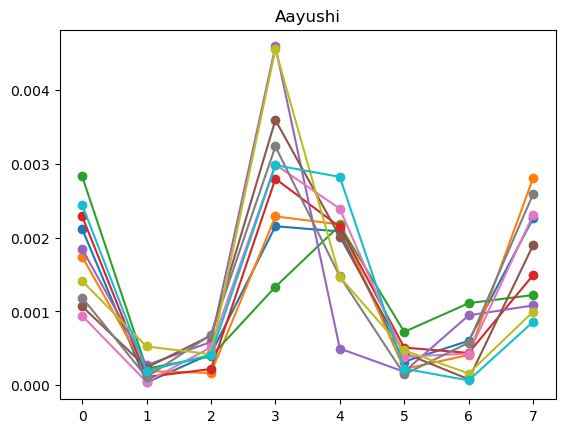

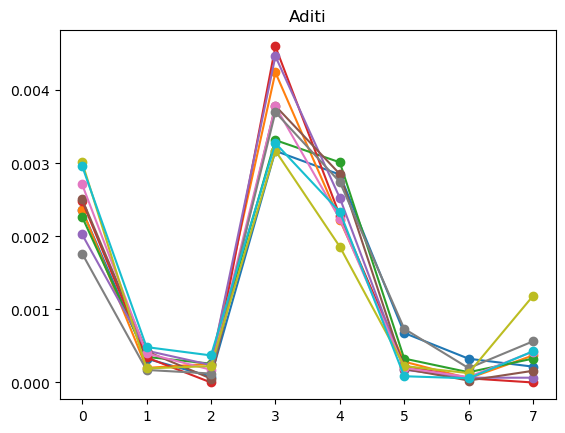

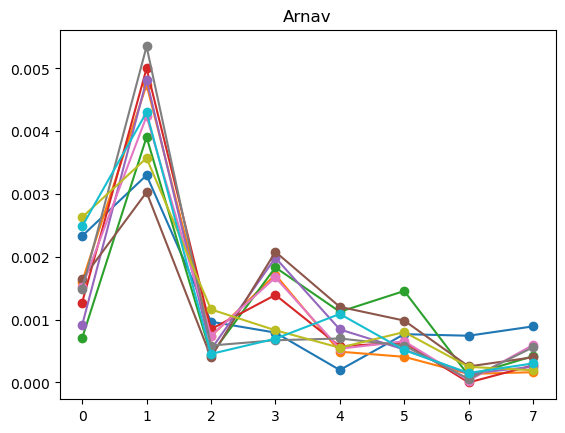

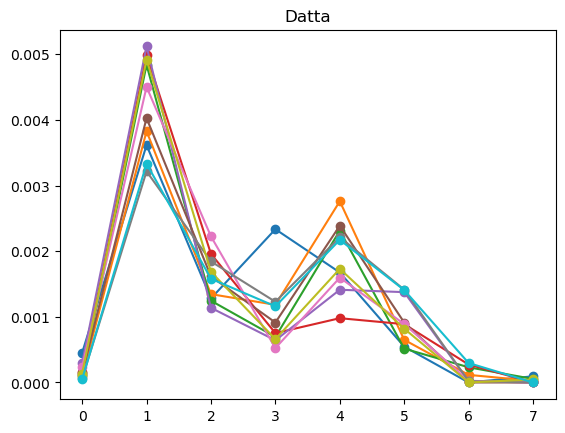

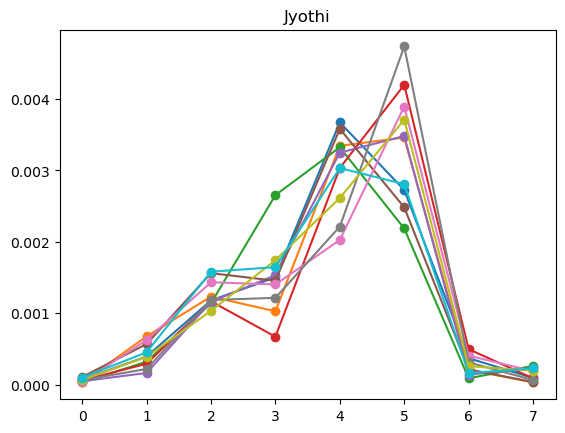

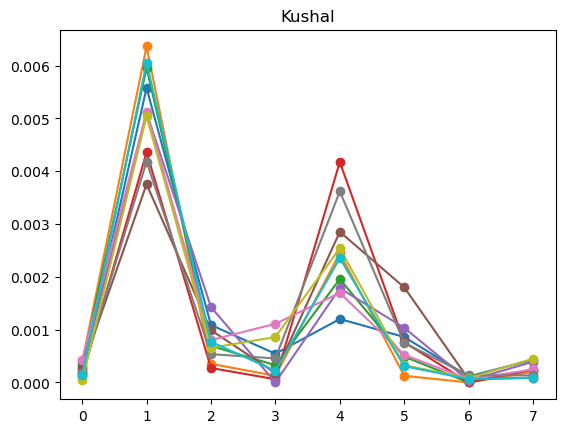

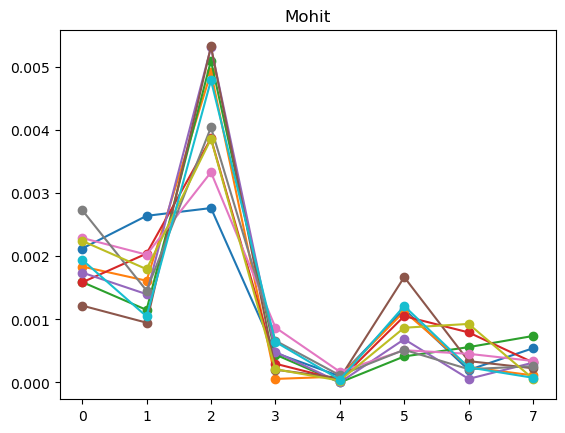

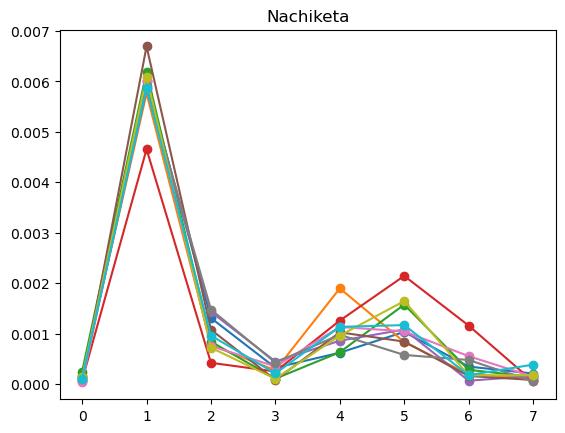

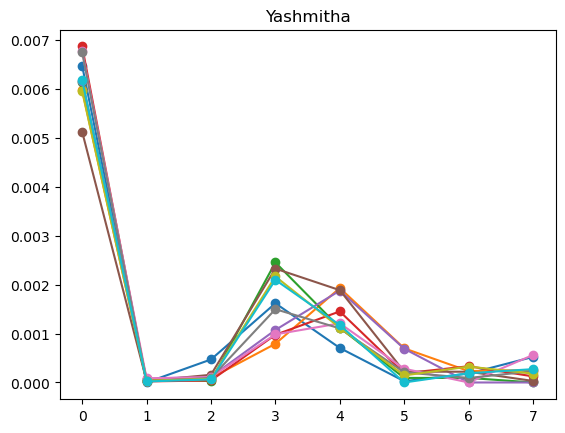

In [30]:
#plot hist for each different person in df
DOM_freq = []
min_dom_freq = 100
max_dom_freq = 1000
for name in df['class'].unique():
    for sig, fs in df[df['class']==name][['y','sr']].values:
        dom_f = dominant_frequencies.get_dominant_frequencies(sig,fs,nfft=512,butter_filter=True)
        dom_f = dom_f[(dom_f>min_dom_freq) & (dom_f<max_dom_freq)]
        h,e = np.histogram(dom_f,bins = range(min_dom_freq,max_dom_freq,100),density=True)
        # df['dom_freq'] = dom_f
        # print(h.shape,e.shape)
        plt.plot(h,'-o',label = name,scaley=True,scalex=True,)
        plt.title(name)

        # break
    plt.show()

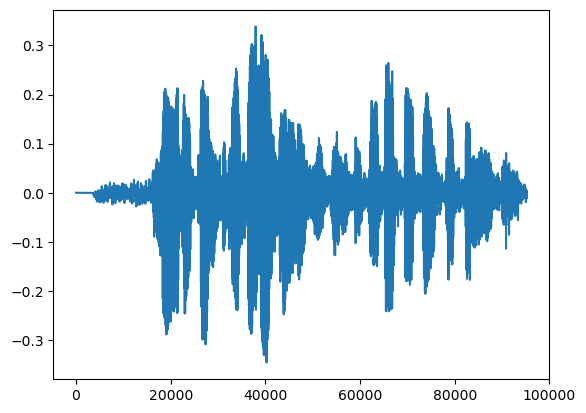

In [31]:
plt.plot(df['y'][0])

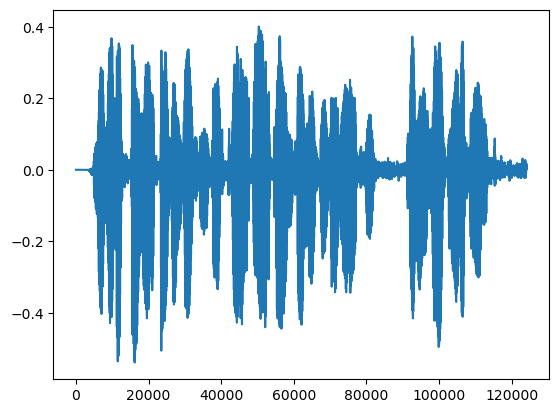

In [32]:
plt.plot(df['y'][1])

**MFCC**

In [33]:
from spafe.features.mfcc import mfcc, imfcc
from spafe.utils.preprocessing import SlidingWindow


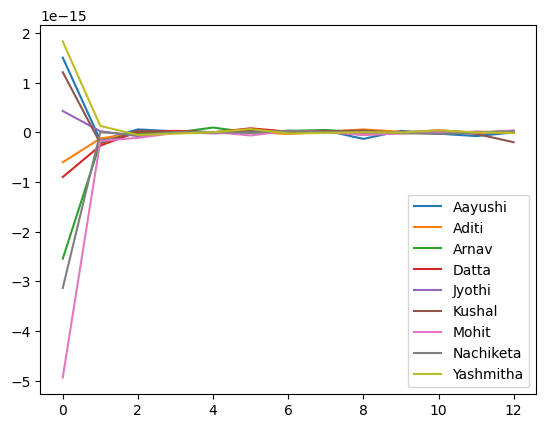

In [34]:
n_mfcc = 13
n_fft = 512
X = []
max_length = 0
i = 0
for sig, fs,name in df[['y','sr','class']].values:
    # Extract MFCCs
    mfccs =mfccs  = mfcc(sig,
              fs=fs,
              pre_emph=1,
              pre_emph_coeff=0.97,
              window=SlidingWindow(0.03, 0.015, "hamming"),
              nfilts=128,
              nfft=n_fft,
              low_freq=50,
              high_freq=4000,
              normalize="mvn",
              num_ceps=n_mfcc)
    mfccs_scaled = np.mean(mfccs,axis=0)
    X.append(mfccs_scaled)
    i+=1
# for i in range(0,len(X),5):
    if i%10==0:
        plt.plot(mfccs_scaled,'-',label = name)
    # plt.plot(mfccs_scaled,'-o',label = name)
plt.legend()
plt.show()

def apply_mfcc(x):
    return np.mean(np.nan_to_num(mfcc(x['y'],fs=x['sr'],pre_emph=1,pre_emph_coeff=0.97,window=SlidingWindow(0.03, 0.015, "hamming"),nfilts=128,nfft=512,low_freq=50,high_freq=4000,normalize="mvn"),posinf=0,neginf=0),axis=0)

In [35]:
df['mfcc'] = df.apply(apply_mfcc,axis=1)

**BFCC**

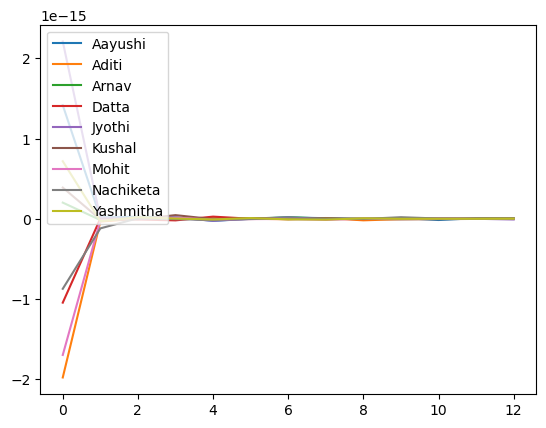

In [36]:
from spafe.features.bfcc import bfcc
from spafe.utils.preprocessing import SlidingWindow

n_bfcc = 45  # Number of BFCC coefficients
n_fft = 512

X = []
max_length = 0
i = 0

for sig, fs, name in df[['y', 'sr', 'class']].values:
    # Extract BFCCs
    bfccs = bfcc(sig,
                 fs=fs,
                 pre_emph=1,
                 pre_emph_coeff=0.97,
                 window=SlidingWindow(0.03, 0.015, "hamming"),
                 nfilts=128,
                 nfft=n_fft,
                 low_freq=50,
                 high_freq=4000,
                 normalize="mvn")
    bfccs_scaled = np.mean(bfccs, axis=0)
    X.append(bfccs_scaled)
    i += 1

    if i % 10 == 0:
        plt.plot(bfccs_scaled, '-', label=name)

plt.legend()
plt.show()

def apply_bfcc(x):
    return np.mean(np.nan_to_num(bfcc(x['y'],fs=x['sr'],pre_emph=1,pre_emph_coeff=0.97,window=SlidingWindow(0.03, 0.015, "hamming"),nfilts=128,nfft=512,low_freq=50,high_freq=4000,normalize="mvn"),posinf=0,neginf=0),axis=0)

In [37]:
df['bfcc'] = df.apply(apply_bfcc,axis=1)

**CQCC**

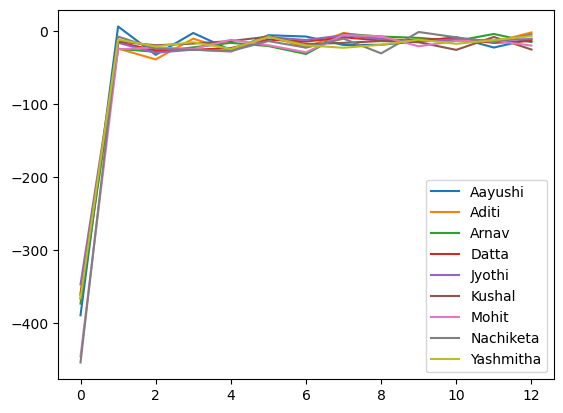

In [38]:
from spafe.features.cqcc import cqcc
from spafe.utils.preprocessing import SlidingWindow

n_cqcc = 45  # Number of CQCC coefficients
n_fft = 512

X = []
max_length = 0
i = 0

for sig, fs, name in df[['y', 'sr', 'class']].values:
    # Extract CQCCs
    cqccs = cqcc(sig,
                 fs=fs,
                 pre_emph=True,
                 pre_emph_coeff=0.97,
                 window=SlidingWindow(0.03, 0.015, "hamming"),
                 nfft=n_fft,
                 low_freq=0,
                 high_freq=None,
                 number_of_octaves=7,
                 number_of_bins_per_octave=24,
                 spectral_threshold=0.005,
                 f0=120,
                 q_rate=1.0)
    cqccs_scaled = np.mean(cqccs, axis=0)
    X.append(cqccs_scaled)
    i += 1

    if i % 10 == 0:
        plt.plot(cqccs_scaled, '-', label=name)

plt.legend()
plt.show()

def apply_cqcc(x):
    return np.mean(np.nan_to_num(cqcc(x['y'],fs=x['sr'],pre_emph=True,pre_emph_coeff=0.97,window=SlidingWindow(0.03, 0.015, "hamming"),nfft=512,low_freq=0,high_freq=None,number_of_octaves=7,number_of_bins_per_octave=24,spectral_threshold=0.005,f0=120,q_rate=1.0),posinf=0,neginf=0),axis=0)


In [39]:
df['cqcc'] = df.apply(apply_cqcc,axis=1)

**GFCC**

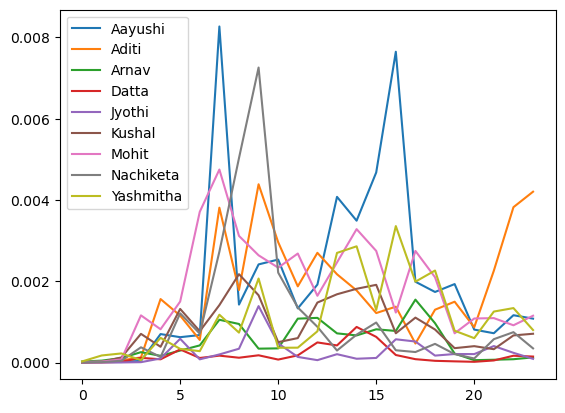

In [40]:
from spafe.features.gfcc import erb_spectrogram
from spafe.utils.preprocessing import SlidingWindow

n_gfcc = 45  # Number of GFCC coefficients
n_fft = 512

X = []
max_length = 0
i = 0

for sig, fs, name in df[['y', 'sr', 'class']].values:
    # Extract GFCCs
    gfccs, _ = erb_spectrogram(sig,
                                fs=fs,
                                pre_emph=True,
                                pre_emph_coeff=0.97,
                                window=SlidingWindow(0.03, 0.015, "hamming"),
                                nfilts=24,
                                nfft=n_fft,
                                low_freq=0,
                                high_freq=None,
                                scale='constant',
                                fbanks=None,
                                conversion_approach='Glasberg')
    gfccs_scaled = np.mean(gfccs, axis=0)
    X.append(gfccs_scaled)
    i += 1

    if i % 10 == 0:
        plt.plot(gfccs_scaled, '-', label=name)

plt.legend()
plt.show()

def apply_gfcc(x):
    return np.mean(np.nan_to_num(erb_spectrogram(x['y'],fs=x['sr'],pre_emph=True,pre_emph_coeff=0.97,window=SlidingWindow(0.03, 0.015, "hamming"),nfilts=24,nfft=512,low_freq=0,high_freq=None,scale='constant',fbanks=None,conversion_approach='Glasberg')[0],posinf=0,neginf=0),axis=0)


In [41]:
df['gfcc'] = df.apply(apply_gfcc,axis=1)

**LFCC**

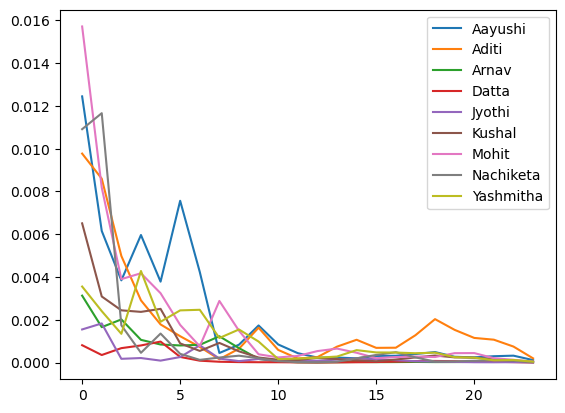

In [42]:
from spafe.features.lfcc import linear_spectrogram
from spafe.utils.preprocessing import SlidingWindow

n_lfcc = 45  # Number of LFCC coefficients
n_fft = 512

X = []
max_length = 0
i = 0

for sig, fs, name in df[['y', 'sr', 'class']].values:
    # Extract LFCCs
    lfccs, _ = linear_spectrogram(sig,
                                   fs=fs,
                                   pre_emph=True,
                                   pre_emph_coeff=0.97,
                                   window=SlidingWindow(0.03, 0.015, "hamming"),
                                   nfilts=24,
                                   nfft=n_fft,
                                   low_freq=0,
                                   high_freq=None,
                                   scale='constant',
                                   fbanks=None)
    lfccs_scaled = np.mean(lfccs, axis=0)
    X.append(lfccs_scaled)
    i += 1

    if i % 10 == 0:
        plt.plot(lfccs_scaled, '-', label=name)

plt.legend()
plt.show()

def apply_lfcc(x):
    return np.mean(np.nan_to_num(linear_spectrogram(x['y'],fs=x['sr'],pre_emph=True,pre_emph_coeff=0.97,window=SlidingWindow(0.03, 0.015, "hamming"),nfilts=24,nfft=512,low_freq=0,high_freq=None,scale='constant',fbanks=None)[0],posinf=0,neginf=0),axis=0)


In [43]:
df['lfcc'] = df.apply(apply_lfcc,axis=1)

**MSRCC**

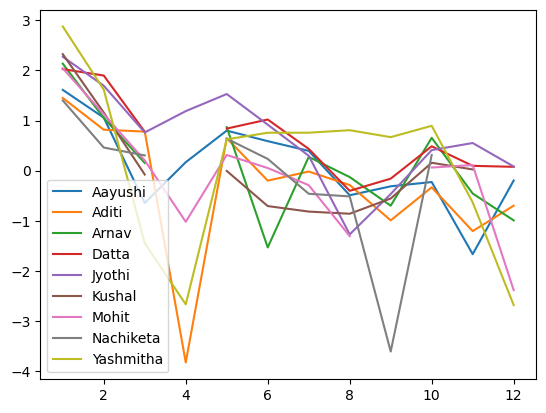

In [44]:
from spafe.features.msrcc import msrcc
from spafe.utils.preprocessing import SlidingWindow

num_ceps = 13  # Number of MSRCC coefficients
n_fft = 512

X = []
max_length = 0
i = 0

for sig, fs, name in df[['y', 'sr', 'class']].values:
    # Extract MSRCCs
    msrccs = msrcc(sig,
                   fs=fs,
                   num_ceps=num_ceps,
                   pre_emph=True,
                   pre_emph_coeff=0.97,
                   window=SlidingWindow(0.03, 0.015, "hamming"),
                   nfilts=24,
                   nfft=n_fft,
                   low_freq=0,
                   high_freq=None,
                   scale='ascendant',  # Change scale to 'ascendant' or 'descendant'
                   gamma=-0.14285714285714285,
                   dct_type=2,
                   use_energy=True,
                   lifter=None,
                   normalize=None,
                   fbanks=None,
                   conversion_approach='Oshaghnessy')

    msrccs_scaled = np.mean(np.nan_to_num(msrccs), axis=0)
    X.append(msrccs_scaled)
    i += 1

    if i % 10 == 0:
        plt.plot(np.log(msrccs_scaled + 1e-10), '-', label=name)  # Add a small epsilon to avoid log(0)

plt.legend()
plt.show()

def apply_msrcc(x):
    return np.mean(np.nan_to_num(msrcc(x['y'],fs=x['sr'],num_ceps=13,pre_emph=True,pre_emph_coeff=0.97,window=SlidingWindow(0.03, 0.015, "hamming"),nfilts=24,nfft=512,low_freq=0,high_freq=None,scale='ascendant',gamma=-0.14285714285714285,dct_type=2,use_energy=False,lifter=None,normalize=None,fbanks=None,conversion_approach='Oshaghnessy'),posinf=0,neginf=0),axis=0)

In [45]:
df['msrcc'] = df.apply(apply_msrcc,axis=1)

**NGCC**

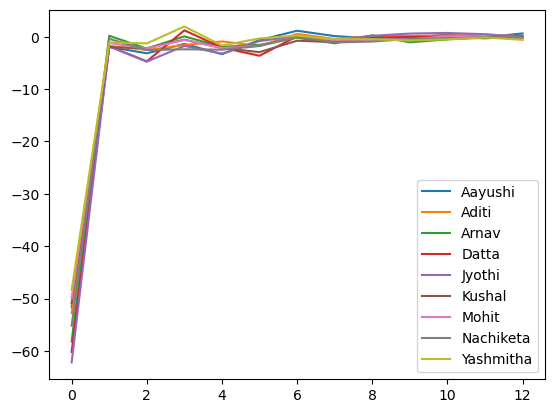

In [46]:
from spafe.features.ngcc import ngcc
from spafe.utils.preprocessing import SlidingWindow

num_ceps = 13  # Number of NGCC coefficients
n_fft = 512

X = []
max_length = 0
i = 0

for sig, fs, name in df[['y', 'sr', 'class']].values:
    # Extract NGCCs
    ngccs = ngcc(sig,
                 fs=fs,
                 num_ceps=num_ceps,
                 pre_emph=True,
                 pre_emph_coeff=0.97,
                 window=SlidingWindow(0.03, 0.015, "hamming"),
                 nfilts=24,
                 nfft=n_fft,
                 low_freq=0,
                 high_freq=None,
                 scale='constant',  # Change scale to 'ascendant', 'descendant', or 'constant'
                 dct_type=2,
                 use_energy=False,
                 lifter=None,
                 normalize=None,  # Change to 'mvn', 'ms', 'vn', or 'mn' as needed
                 fbanks=None,
                 conversion_approach='Glasberg')

    ngccs_scaled = np.mean(ngccs, axis=0)
    X.append(ngccs_scaled)
    i += 1

    if i % 10 == 0:
        plt.plot(ngccs_scaled, '-', label=name)

plt.legend()
plt.show()

def apply_ngcc(x):
    return np.mean(np.nan_to_num(ngcc(x['y'],fs=x['sr'],num_ceps=13,pre_emph=True,pre_emph_coeff=0.97,window=SlidingWindow(0.03, 0.015, "hamming"),nfilts=24,nfft=512,low_freq=0,high_freq=None,scale='constant',dct_type=2,use_energy=False,lifter=None,normalize=None,fbanks=None,conversion_approach='Glasberg'),posinf=0,neginf=0),axis=0)


In [47]:
df['ngcc'] = df.apply(apply_ngcc,axis=1)

**PNCC**

In [48]:
# from spafe.features.pncc import pncc
# from spafe.utils.preprocessing import SlidingWindow

# num_ceps = 13  # Number of PNCC coefficients
# n_fft = 512

# X = []
# max_length = 0
# i = 0

# for sig, fs, name in df[['y', 'sr', 'class']].values:
#     # Extract PNCCs
#     pnccs = pncc(sig.reshape(-1,1),
#                  fs=fs,
#                  num_ceps=num_ceps,
#                  pre_emph=True,
#                  pre_emph_coeff=0.97,
#                  power=2,
#                  window=SlidingWindow(0.03, 0.015, "hamming"),
#                  nfilts=24,
#                  nfft=n_fft,
#                  low_freq=0,
#                  high_freq=None,
#                  scale='constant',  # Change scale to 'ascendant', 'descendant', or 'constant'
#                  dct_type=2,
#                  lifter=None,
#                  normalize=None,  # Change to 'mvn', 'ms', 'vn', or 'mn' as needed
#                  fbanks=None,
#                  conversion_approach='Glasberg')
#     # compute pnccs


#     pnccs_scaled = np.max(pnccs.T, axis=0)
#     X.append(pnccs_scaled)
#     i += 1

#     if i % 10 == 0:
#         plt.plot(pnccs_scaled, '-', label=name)

# plt.legend()
# plt.show()
# not working


**PSRCC**

In [49]:
# from spafe.features.psrcc import psrcc
# from spafe.utils.preprocessing import SlidingWindow

# num_ceps = 13  # Number of PSRCC coefficients
# n_fft = 512

# X = []
# max_length = 0
# i = 0

# for sig, fs, name in df[['y', 'sr', 'class']].values:
#     # Extract PSRCCs
#     psrccs = psrcc(sig,
#                     fs=fs,
#                     num_ceps=num_ceps,
#                     pre_emph=True,
#                     pre_emph_coeff=0.97,
#                     window=SlidingWindow(0.03, 0.015, "hamming"),
#                     nfilts=26,
#                     nfft=n_fft,
#                     low_freq=0,
#                     high_freq=None,
#                     scale='constant',  # Change scale to 'ascendant', 'descendant', or 'constant'
#                     gamma=-0.14285714285714285,
#                     dct_type=2,
#                     use_energy=True,
#                     lifter=None,
#                     normalize='mvn',  # Change to 'mvn', 'ms', 'vn', or 'mn' as needed
#                     fbanks=None,
#                     conversion_approach='Oshaghnessy')

#     psrccs_scaled = np.mean(np.nan_to_num(psrccs), axis=0)
#     X.append(psrccs_scaled)
#     i += 1

#     if i % 10 == 0:
#         plt.plot(psrccs_scaled, '-', label=name)

# plt.ylim(1.8, 2.0)  # Set y-axis limits to include the range of y-labels
# #plt.yscale('log')  # Apply log scaling to y-axis
# plt.legend()
# plt.show()

# def apply_psrcc(x):
#     return np.mean(np.nan_to_num(psrcc(x['y'],fs=x['sr'],num_ceps=13,pre_emph=True,pre_emph_coeff=0.97,window=SlidingWindow(0.03, 0.015, "hamming"),nfilts=26,nfft=512,low_freq=0,high_freq=None,scale='constant',gamma=-0.14285714285714285,dct_type=2,use_energy=False,lifter=None,normalize=None,fbanks=None,conversion_approach='Oshaghnessy')),axis=0)


In [50]:
# df['psrcc'] = df.apply(apply_psrcc,axis=1)

**RPLP**

In [51]:
# from spafe.features.rplp import plp, rplp
# from spafe.utils.preprocessing import SlidingWindow

# order = 20  # Increase the order
# n_fft = 512

# X = []
# max_length = 0
# i = 0

# for sig, fs, name in df[['y', 'sr', 'class']].values:
#     # Extract RPLP features
#     rplp_feats = plp(sig,
#                      fs=fs,
#                      order=order,
#                      pre_emph=True,  # Enable pre-emphasis
#                      pre_emph_coeff=0.97,
#                      window=SlidingWindow(0.03, 0.015, "hamming"),
#                      nfilts=24,
#                      nfft=n_fft,
#                      low_freq=0,
#                      high_freq=None,
#                      scale='constant',  # Change scale to 'ascendant', 'descendant', or 'constant'
#                      lifter=None,
#                      normalize=None,  # Change to 'mvn', 'ms', 'vn', or 'mn' as needed
#                      fbanks=None,
#                      conversion_approach='Wang')  # Change approach as needed
#     rplp_feats_scaled = np.max(rplp_feats.T, axis=0)
#     X.append(rplp_feats_scaled)
#     i += 1

#     if i % 10 == 0:
#         plt.plot(rplp_feats_scaled, '-', label=name)

# plt.legend()
# plt.show()

# not working

**LPC**

In [52]:
# from spafe.features.lpc import lpc
# from spafe.utils.preprocessing import SlidingWindow

# order = 13  # Order of LPC analysis

# X = []
# max_length = 0
# i = 0

# for sig, fs, name in df[['y', 'sr', 'class']].values:
#     # Compute LPC coefficients
#     lpc_coeffs = lpc(sig,
#                      fs=fs,
#                      order=order,
#                      pre_emph=True,
#                      pre_emph_coeff=0.97,
#                      window=SlidingWindow(0.03, 0.015, "hamming"))

#     X.append(lpc_coeffs)
#     i += 1

#     if i % 10 == 0:
#         plt.plot(lpc_coeffs, '-', label=name)

# plt.legend()
# plt.show()
# not working


In [53]:
df.head()

,file,y,sr,class,targets,dom_freq_density,mfcc,bfcc,cqcc,gfcc,lfcc,msrcc,ngcc
0,Aayushi_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0021201413427561835, 3.53356890459364e-05, ...","[-5.835440531871249e-16, 7.069451489555658e-17...","[2.1848570184957786e-15, 2.1856306930773987e-1...","[-359.07435237824245, -19.314641640002588, -27...","[4.111757287594021e-06, 6.286517968958633e-06,...","[0.005869745249137121, 0.002972889005237228, 0...","[46.45039348979546, 6.221424754987261, 3.42005...","[-55.95895598044859, -0.3004871099472881, -3.7..."
1,Aayushi_E_10.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0017438692098092643, 0.0001907356948228883,...","[2.4954852998841186e-15, -1.728247174999827e-1...","[1.3461824247921565e-15, 1.2614909117303342e-1...","[-386.6903918764639, -4.3161066082554, -24.412...","[7.945899657693033e-06, 1.0187537467774794e-05...","[0.012981335477921007, 0.005373939707601667, 0...","[39.67884192917095, 6.064498549141595, 3.94746...","[-50.77101561976518, -1.4442018143012285, -3.9..."
2,Aayushi_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0028333333333333335, 0.00022222222222222223...","[2.2661000801694784e-15, -1.6355037780985075e-...","[-2.6125908290346776e-15, 1.1024410875366624e-...","[-313.75611188555064, -24.078505368204425, -32...","[4.045757802611597e-06, 6.270541489779921e-06,...","[0.00565891059077557, 0.0020570286128076074, 0...","[52.640391129099605, 9.19880829160669, 3.82876...","[-58.05991646149264, -0.13346067804911343, -3...."
3,Aayushi_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.002290909090909091, 0.00010909090909090909,...","[-3.5131211665252657e-15, 5.938876841285304e-1...","[1.133284642599907e-15, 1.3061447348531253e-17...","[-346.8917904182517, -16.724251628921753, -25....","[6.62402531832338e-06, 9.3219561505265e-06, 1....","[0.0075504392085777505, 0.0014893567491023189,...","[46.41582648189839, 7.700839898573169, 3.01645...","[-55.214700091580546, -0.357363252974678, -2.3..."
4,Aayushi_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0018468468468468466, 0.0002702702702702703,...","[-3.389982358752704e-15, -4.0049141070953133e-...","[2.3801356623813286e-16, 5.592304904290528e-17...","[-323.24254716233304, -18.85613988955094, -28....","[4.5404259487161014e-06, 6.397646923040112e-06...","[0.0037836204899607483, 0.001297211044918933, ...","[56.440869778808896, 10.537377053569864, 3.757...","[-58.65122968125266, 0.6640577782862305, -2.59..."


In [54]:
#dom_freq_density	mfcc	bfcc	cqcc	gfcc	lfcc	msrcc	ngcc
def concat_features(x):
    return np.concatenate([x['dom_freq_density'],x['mfcc'],x['bfcc'],x['cqcc'],x['gfcc'],x['lfcc'],x['msrcc'],x['ngcc']],axis=0)

In [55]:
df['concat_features'] = df.apply(concat_features,axis=1)

In [56]:
df.head()

,file,y,sr,class,targets,dom_freq_density,mfcc,bfcc,cqcc,gfcc,lfcc,msrcc,ngcc,concat_features
0,Aayushi_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0021201413427561835, 3.53356890459364e-05, ...","[-5.835440531871249e-16, 7.069451489555658e-17...","[2.1848570184957786e-15, 2.1856306930773987e-1...","[-359.07435237824245, -19.314641640002588, -27...","[4.111757287594021e-06, 6.286517968958633e-06,...","[0.005869745249137121, 0.002972889005237228, 0...","[46.45039348979546, 6.221424754987261, 3.42005...","[-55.95895598044859, -0.3004871099472881, -3.7...","[0.0021201413427561835, 3.53356890459364e-05, ..."
1,Aayushi_E_10.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0017438692098092643, 0.0001907356948228883,...","[2.4954852998841186e-15, -1.728247174999827e-1...","[1.3461824247921565e-15, 1.2614909117303342e-1...","[-386.6903918764639, -4.3161066082554, -24.412...","[7.945899657693033e-06, 1.0187537467774794e-05...","[0.012981335477921007, 0.005373939707601667, 0...","[39.67884192917095, 6.064498549141595, 3.94746...","[-50.77101561976518, -1.4442018143012285, -3.9...","[0.0017438692098092643, 0.0001907356948228883,..."
2,Aayushi_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0028333333333333335, 0.00022222222222222223...","[2.2661000801694784e-15, -1.6355037780985075e-...","[-2.6125908290346776e-15, 1.1024410875366624e-...","[-313.75611188555064, -24.078505368204425, -32...","[4.045757802611597e-06, 6.270541489779921e-06,...","[0.00565891059077557, 0.0020570286128076074, 0...","[52.640391129099605, 9.19880829160669, 3.82876...","[-58.05991646149264, -0.13346067804911343, -3....","[0.0028333333333333335, 0.00022222222222222223..."
3,Aayushi_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.002290909090909091, 0.00010909090909090909,...","[-3.5131211665252657e-15, 5.938876841285304e-1...","[1.133284642599907e-15, 1.3061447348531253e-17...","[-346.8917904182517, -16.724251628921753, -25....","[6.62402531832338e-06, 9.3219561505265e-06, 1....","[0.0075504392085777505, 0.0014893567491023189,...","[46.41582648189839, 7.700839898573169, 3.01645...","[-55.214700091580546, -0.357363252974678, -2.3...","[0.002290909090909091, 0.00010909090909090909,..."
4,Aayushi_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0018468468468468466, 0.0002702702702702703,...","[-3.389982358752704e-15, -4.0049141070953133e-...","[2.3801356623813286e-16, 5.592304904290528e-17...","[-323.24254716233304, -18.85613988955094, -28....","[4.5404259487161014e-06, 6.397646923040112e-06...","[0.0037836204899607483, 0.001297211044918933, ...","[56.440869778808896, 10.537377053569864, 3.757...","[-58.65122968125266, 0.6640577782862305, -2.59...","[0.0018468468468468466, 0.0002702702702702703,..."


In [102]:


# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


## Speaker Verification

In [61]:
df.head()

,file,y,sr,class,targets,dom_freq_density,mfcc,bfcc,cqcc,gfcc,lfcc,msrcc,ngcc,concat_features
0,Aayushi_E_1.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0021201413427561835, 3.53356890459364e-05, ...","[-5.835440531871249e-16, 7.069451489555658e-17...","[2.1848570184957786e-15, 2.1856306930773987e-1...","[-359.07435237824245, -19.314641640002588, -27...","[4.111757287594021e-06, 6.286517968958633e-06,...","[0.005869745249137121, 0.002972889005237228, 0...","[46.45039348979546, 6.221424754987261, 3.42005...","[-55.95895598044859, -0.3004871099472881, -3.7...","[0.0021201413427561835, 3.53356890459364e-05, ..."
1,Aayushi_E_10.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0017438692098092643, 0.0001907356948228883,...","[2.4954852998841186e-15, -1.728247174999827e-1...","[1.3461824247921565e-15, 1.2614909117303342e-1...","[-386.6903918764639, -4.3161066082554, -24.412...","[7.945899657693033e-06, 1.0187537467774794e-05...","[0.012981335477921007, 0.005373939707601667, 0...","[39.67884192917095, 6.064498549141595, 3.94746...","[-50.77101561976518, -1.4442018143012285, -3.9...","[0.0017438692098092643, 0.0001907356948228883,..."
2,Aayushi_E_2.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0028333333333333335, 0.00022222222222222223...","[2.2661000801694784e-15, -1.6355037780985075e-...","[-2.6125908290346776e-15, 1.1024410875366624e-...","[-313.75611188555064, -24.078505368204425, -32...","[4.045757802611597e-06, 6.270541489779921e-06,...","[0.00565891059077557, 0.0020570286128076074, 0...","[52.640391129099605, 9.19880829160669, 3.82876...","[-58.05991646149264, -0.13346067804911343, -3....","[0.0028333333333333335, 0.00022222222222222223..."
3,Aayushi_E_3.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.002290909090909091, 0.00010909090909090909,...","[-3.5131211665252657e-15, 5.938876841285304e-1...","[1.133284642599907e-15, 1.3061447348531253e-17...","[-346.8917904182517, -16.724251628921753, -25....","[6.62402531832338e-06, 9.3219561505265e-06, 1....","[0.0075504392085777505, 0.0014893567491023189,...","[46.41582648189839, 7.700839898573169, 3.01645...","[-55.214700091580546, -0.357363252974678, -2.3...","[0.002290909090909091, 0.00010909090909090909,..."
4,Aayushi_E_4.m4a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,Aayushi,0,"[0.0018468468468468466, 0.0002702702702702703,...","[-3.389982358752704e-15, -4.0049141070953133e-...","[2.3801356623813286e-16, 5.592304904290528e-17...","[-323.24254716233304, -18.85613988955094, -28....","[4.5404259487161014e-06, 6.397646923040112e-06...","[0.0037836204899607483, 0.001297211044918933, ...","[56.440869778808896, 10.537377053569864, 3.757...","[-58.65122968125266, 0.6640577782862305, -2.59...","[0.0018468468468468466, 0.0002702702702702703,..."


In [97]:
# Create a dataframe which has 3 columsns: signal1, signal2 and label
# label ==1 means the signals are from same persom, 0 means from different person

df_verification = pd.DataFrame(columns=['file1','file2','label'])
# randomly pair the signals
df_verification[['file1','class1']] = df[['file','class']].sample(frac=10,random_state=32,replace=True).values
df_verification[['file2','class2']] = df[['file','class']].sample(frac=10,random_state=42,replace=True).values
df_verification['label'] = (df_verification['class1']==df_verification['class2']).astype(int)

In [101]:
df_verification.head()

,file1,file2,label,class1,class2
0,Yashmitha_E_7.m4a,Kushal_E_10.m4a,0,Yashmitha,Kushal
1,Jyothi_E_4.m4a,Aditi_E_5.m4a,0,Jyothi,Aditi
2,Aayushi_E_5.m4a,Nachiketa_E_10.m4a,0,Aayushi,Nachiketa
3,Kushal_E_4.m4a,Mohit_E_1.m4a,0,Kushal,Mohit
4,Mohit_E_2.m4a,Arnav_E_1.m4a,0,Mohit,Arnav


In [108]:
file1_train, file1_test,file2_train, file2_test,  label_train, label_test = train_test_split(df_verification.file1.values,df_verification.file2.values,df_verification.label.values,random_state=5,shuffle=True,test_size=0.3,stratify=df_verification.label.values)


In [114]:
# features_train = np.stack(df[df['file'].isin(file1_train) | df['file'].isin(file2_train)]['concat_features'].values)
features_train_map = {i:df[df['file']==i]['concat_features'].values[0] for i in set(file1_train.tolist()+file2_train.tolist())}
features_train = np.stack([features_train_map[i] for i in features_train_map.keys()])
label_train_map = {i:df[df['file']==i]['targets'].values for i in set(file1_train.tolist()+file2_train.tolist())}
feature_label_train = np.stack([label_train_map[i] for i in features_train_map.keys()])

In [115]:
# DO LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda.fit(features_train, feature_label_train)

LinearDiscriminantAnalysis(n_components=2)

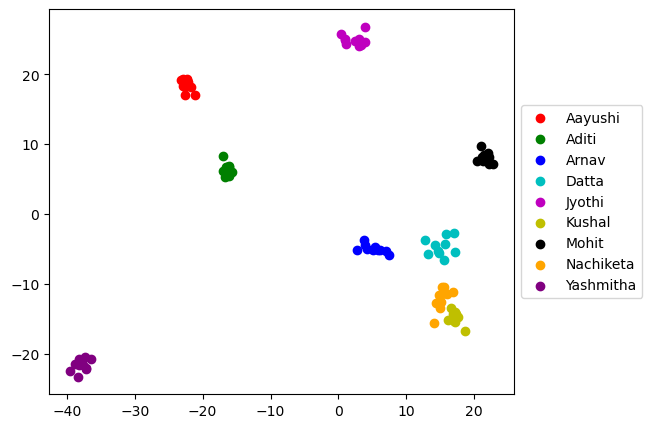

In [127]:
def lda_plot(lda,X_train,y_train):
    X_lda = lda.transform(X_train)
    y_train = y_train.flatten()
    target_ids = range(len(np.unique(y_train)))
    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k','orange','purple','brown','pink'
    for i, c, label in zip(target_ids, colors, np.unique(df['class'])):
        plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], c=c, label=label)
    #legend to right side
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
lda_plot(lda,features_train,feature_label_train)

In [133]:

from math import sqrt, pow, exp
 
def squared_sum(x):
  """ return 3 rounded square rooted value """
 
  return round(sqrt(sum([a*a for a in x])),3)
def cos_similarity(x,y):
  """ return cosine similarity between two lists """
 
  numerator = sum(a*b for a,b in zip(x,y))
  denominator = squared_sum(x)*squared_sum(y)
  return round(numerator/float(denominator),3)


In [134]:
scores = []
for file1, file2 in zip(file1_test,file2_test):
    features1 = df[df['file']==file1]['concat_features'].values[0]
    features2 = df[df['file']==file2]['concat_features'].values[0]
    embed1 = lda.transform([features1])
    embed2 = lda.transform([features2])

    score =  cos_similarity(embed1, embed2)
    scores.append(score)
    print(f'File1: {file1}, File2: {file2}, Score: {score}')

TypeError: only length-1 arrays can be converted to Python scalars

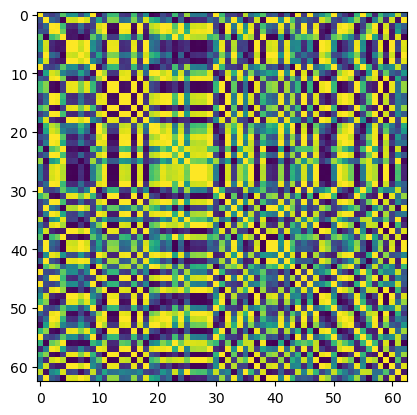

In [58]:


# check the cosine similarities between samples
from sklearn.metrics.pairwise import cosine_similarity

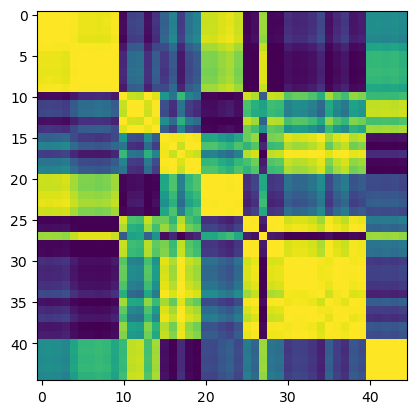

In [59]:
# select random 5 samples from each class
# plot the cosine similarity matrix for these samples

random_samples = []
for i in df.targets.unique():
    random_samples.append(df[df.targets==i].sample(5))
random_samples = pd.concat(random_samples)
X_random = np.stack(random_samples['concat_features'].values)
y_random = random_samples.targets.values
X_random = lda.transform(X_random)
cos_sim = cosine_similarity(X_random)
plt.imshow(cos_sim)

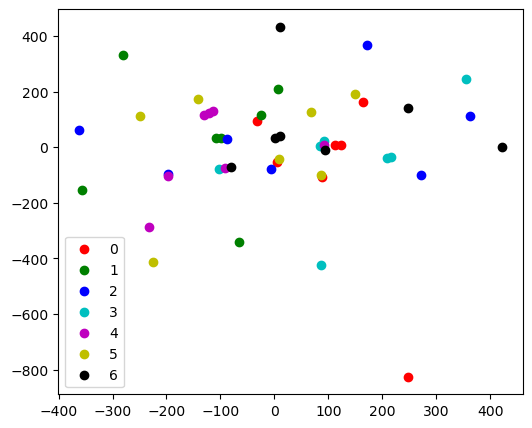

In [75]:
from sklearn.manifold import TSNE
# tsne plot of training data X_train and y_train
def tsne_plot(X_train,y_train):
    tsne = TSNE(n_components=2, random_state=0,perplexity=0.2,n_iter=10000)
    X_2d = tsne.fit_transform(X_train)
    target_ids = range(len(np.unique(y_train)))
    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k'
    for i, c, label in zip(target_ids, colors, np.unique(y_train)):
        plt.scatter(X_2d[y_train == i, 0], X_2d[y_train == i, 1], c=c, label=label)
    plt.legend()
    plt.show()
tsne_plot(X_train,y_train)

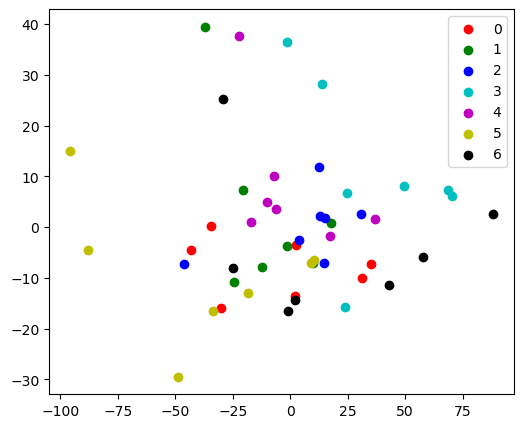

In [76]:
from sklearn.decomposition import PCA
def pca_plot(X_train,y_train):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train)
    target_ids = range(len(np.unique(y_train)))
    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k'
    for i, c, label in zip(target_ids, colors, np.unique(y_train)):
        plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], c=c, label=label)
    plt.legend()
    plt.show()
pca_plot(X_train,y_train)

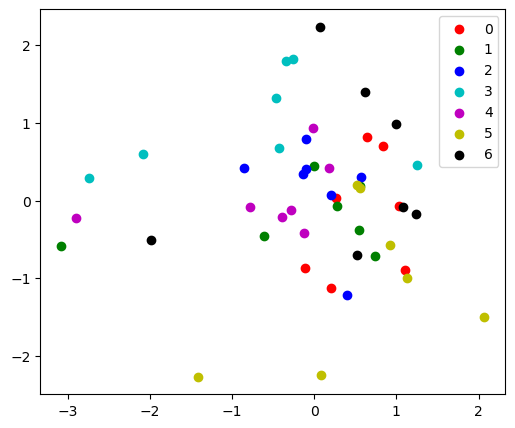

In [78]:
from sklearn.decomposition import FastICA
def ica_plot(X_train,y_train):
    ica = FastICA(n_components=2,max_iter=1000)
    X_ica = ica.fit_transform(X_train)
    target_ids = range(len(np.unique(y_train)))
    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k'
    for i, c, label in zip(target_ids, colors, np.unique(y_train)):
        plt.scatter(X_ica[y_train == i, 0], X_ica[y_train == i, 1], c=c, label=label)
    plt.legend()
    plt.show()
ica_plot(X_train,y_train)

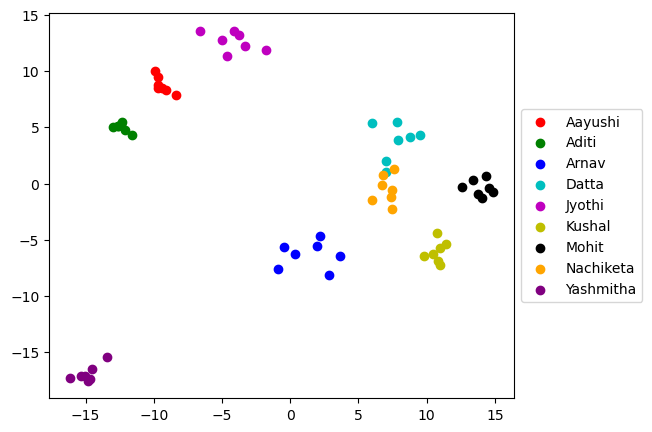

In [84]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
def lda_plot(X_train,y_train):
    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X_train,y_train)
    target_ids = range(len(np.unique(y_train)))
    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k','orange','purple','brown','pink'
    for i, c, label in zip(target_ids, colors, np.unique(df['class'])):
        plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], c=c, label=label)
    #legend to right side
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
lda_plot(X_train,y_train)

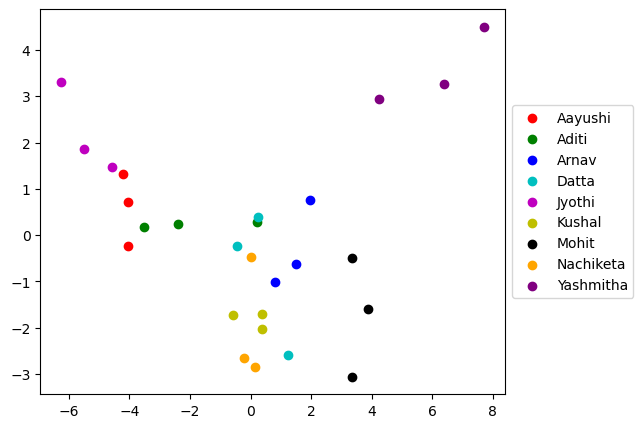

In [85]:
lda_plot(X_test,y_test)